# **Import Libraries and modules**

**the iterations are explained in the convolution block**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))

In [42]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


(60000, 28, 28, 1)


TypeError: ignored

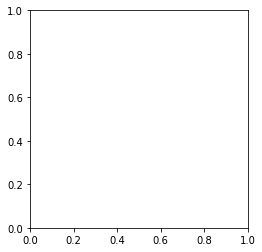

In [43]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [46]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


In [47]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [49]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [51]:
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Data Generator mean=0.131, std=0.308


In [0]:
iterator = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)

In [0]:
batchX, batchy = iterator.next()

In [54]:
print(batchX.shape, batchX.mean(), batchX.std())

(60000, 28, 28, 1) -4.9324944e-07 0.9999959


In [55]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1)))#26*26*10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#24*24*16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#22*22*32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))#11*11*32

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.01)))#11*11*10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#9*9*16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.01)))#9*9*10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#7*7*1
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.01)))#7*7*10
model.add(BatchNormalization())
model.add(Activation('relu'))

'''model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))'''

model.add(Dropout(0.10))

model.add(Convolution2D(10, 7, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`


**In the convolution block the L2 regularisation was done ,
The relu activation was performed after batch normalisation and image normalisation is also done before the convolution blockt**

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [68]:
i=0
def bestval(val_acc):
  if(i==0):
    oldval=val_acc
    model.save()
  else:
    if(val_acc>oldval):
      model.save()
      oldval=val_acc
      i+=1
    
    
  
model.fit(batchX, batchy, batch_size=256, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 5s 78us/step - loss: 0.1760 - acc: 0.9823 - val_loss: 2.1772 - val_acc: 0.3111
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 4s 74us/step - loss: 0.1377 - acc: 0.9846 - val_loss: 1.2558 - val_acc: 0.6694
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 4s 75us/step - loss: 0.1184 - acc: 0.9858 - val_loss: 0.6637 - val_acc: 0.8223
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 4s 75us/step - loss: 0.1067 - acc: 0.9862 - val_loss: 0.5649 - val_acc: 0.8976
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==========

Im not sure how to save the best validation accuracy or how to make the 25 misclassified images

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [70]:
print(score)

[0.3412800203204155, 0.8949]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()